In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
import joblib

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.56,0.45,0.17,0.89,0.37,0.24,0.25,11
4173,M,0.59,0.44,0.14,0.97,0.44,0.21,0.26,10
4174,M,0.60,0.47,0.20,1.18,0.53,0.29,0.31,9
4175,F,0.62,0.48,0.15,1.09,0.53,0.26,0.30,10


### The number of rings is the value to predict. 
### age of abalone: rings +1.5 gives the age in years.

### Sex / nominal / -- / M, F, and I (infant)
### Length / continuous / mm / Longest shell measurement
### Diameter / continuous / mm / perpendicular to length
### Height / continuous / mm / with meat in shell
### Whole weight / continuous / grams / whole abalone
### Shucked weight / continuous / grams / weight of meat
### Viscera weight / continuous / grams / gut weight (after bleeding)
### Shell weight / continuous / grams / after being dried

In [3]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (4177, 9)


In [4]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

### sex is categorical value
### rings is int value
### rest all are float value

### conv alphabets to numerical data
### assign each alphabet a unique value

In [6]:
dicty={}
for i in df[['Sex']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Sex': {'F': 1, 'I': 2, 'M': 0}}

### substitue categorical data in dataset to numeric

In [7]:
for i in ['Sex']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [8]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,0,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,1,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,0,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,2,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.56,0.45,0.17,0.89,0.37,0.24,0.25,11
4173,0,0.59,0.44,0.14,0.97,0.44,0.21,0.26,10
4174,0,0.60,0.47,0.20,1.18,0.53,0.29,0.31,9
4175,1,0.62,0.48,0.15,1.09,0.53,0.26,0.30,10


### check the correlation in new dataset to consider relevant columns

In [9]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.00,-0.45,-0.46,-0.42,-0.46,-0.44,-0.45,-0.45,-0.35
Length,-0.45,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
Diameter,-0.46,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
Height,-0.42,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
Whole weight,-0.46,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
Shucked weight,-0.44,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
Viscera weight,-0.45,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
Shell weight,-0.45,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
Rings,-0.35,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


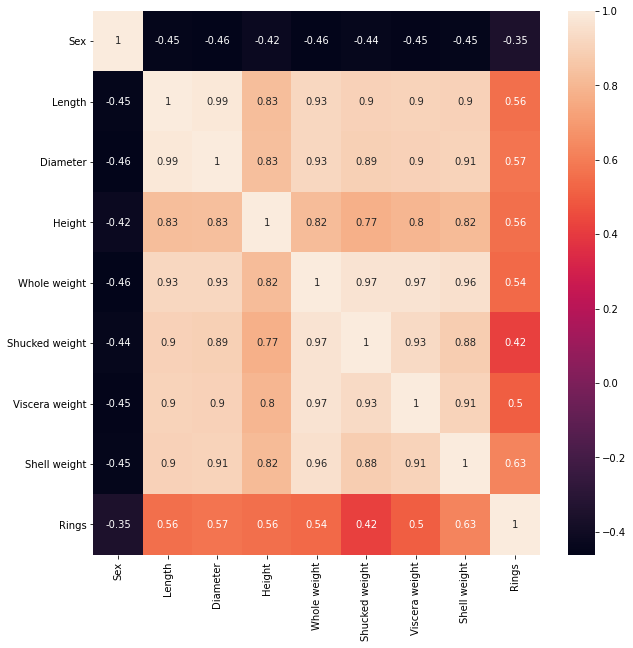

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(df.corr(),annot=True,ax=ax)

### column sex and shucked weight has less corelation drop (for good correlation>= 0.5 and good correlation<=-0.5)

In [11]:
df=df.drop(['Sex','Shucked weight'],axis=1)
df

,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,0.46,0.36,0.10,0.51,0.10,0.15,15
1,0.35,0.27,0.09,0.23,0.05,0.07,7
2,0.53,0.42,0.14,0.68,0.14,0.21,9
3,0.44,0.36,0.12,0.52,0.11,0.15,10
4,0.33,0.26,0.08,0.20,0.04,0.06,7
...,...,...,...,...,...,...,...
4172,0.56,0.45,0.17,0.89,0.24,0.25,11
4173,0.59,0.44,0.14,0.97,0.21,0.26,10
4174,0.60,0.47,0.20,1.18,0.29,0.31,9
4175,0.62,0.48,0.15,1.09,0.26,0.30,10


In [12]:
df.describe()

,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.18,0.24,9.93
std,0.12,0.10,0.04,0.49,0.11,0.14,3.22
min,0.07,0.06,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.17,0.23,9.00
75%,0.61,0.48,0.17,1.15,0.25,0.33,11.00
max,0.81,0.65,1.13,2.83,0.76,1.00,29.00


In [13]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (4177, 7)


### check for outliers

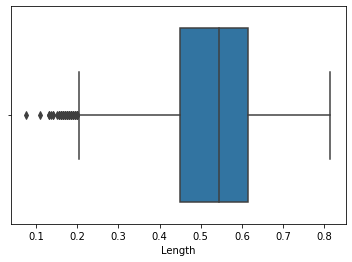

In [14]:
sn.boxplot(df['Length'])

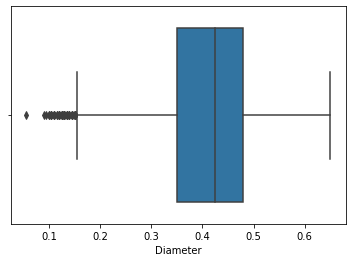

In [15]:
sn.boxplot(df['Diameter'])

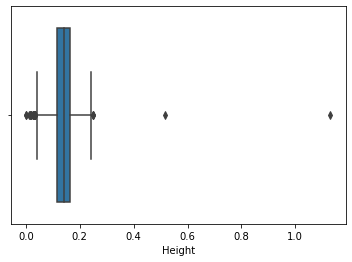

In [16]:
sn.boxplot(df['Height'])

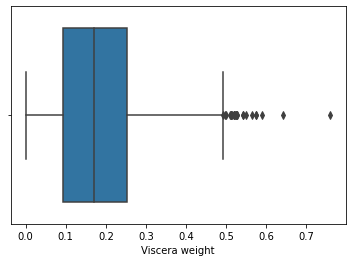

In [17]:
sn.boxplot(df['Viscera weight'])

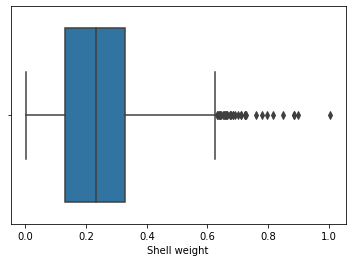

In [18]:
sn.boxplot(df['Shell weight'])

### there are outliers present. remove them

In [19]:
z_scr=zscore(df)
print(df.shape)
df_new=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(4177, 7)
(4046, 7)


In [20]:
((4177-4046)/4177)*100

3.136222169020828

### cross check if outliers are removed

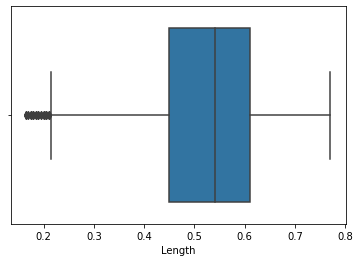

In [21]:
sn.boxplot(df_new['Length'])

### nope try iqr and check again

In [22]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(3801, 7)

In [23]:
((4177-3801)/4177)*100

9.00167584390711

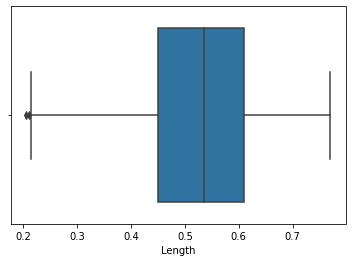

In [24]:
sn.boxplot(data_clean['Length'])

### try to remove some more

In [25]:
z_scr=zscore(data_clean)
print(data_clean.shape)
df_new=data_clean.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(3801, 7)
(3789, 7)


In [26]:
((4177-3789)/4177)*100

9.288963370840316

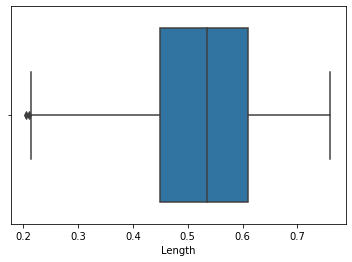

In [27]:
sn.boxplot(df_new['Length'])

In [28]:
Q1 = df_new.quantile(q=.25)
Q3 = df_new.quantile(q=.75)
IQR = df_new.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df_new[~((df_new < (Q1-1.5*IQR)) | (df_new > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(3781, 7)

In [29]:
((4177-3781)/4177)*100

9.480488388795786

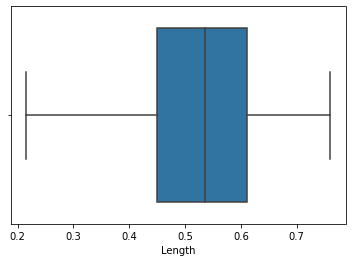

In [30]:
sn.boxplot(data_clean['Length'])

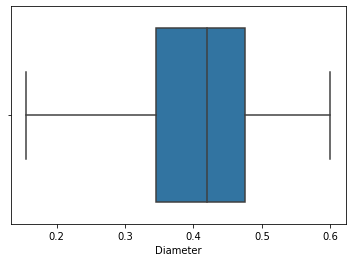

In [31]:
sn.boxplot(data_clean['Diameter'])

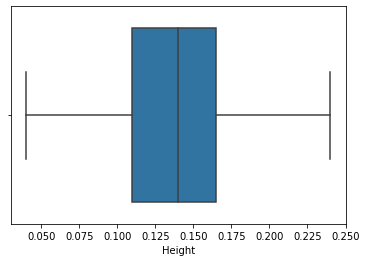

In [32]:
sn.boxplot(data_clean['Height'])

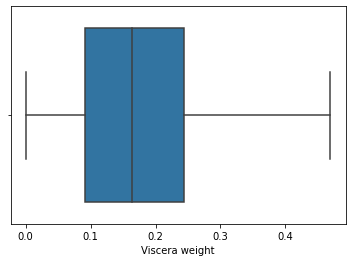

In [33]:
sn.boxplot(data_clean['Viscera weight'])

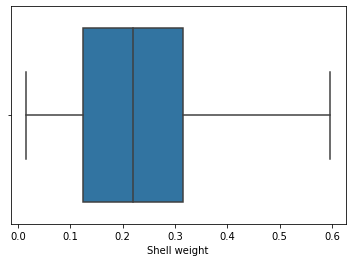

In [34]:
sn.boxplot(data_clean['Shell weight'])

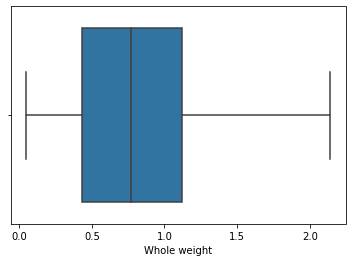

In [35]:
sn.boxplot(data_clean['Whole weight'])

### all outliers removed

### check distribution

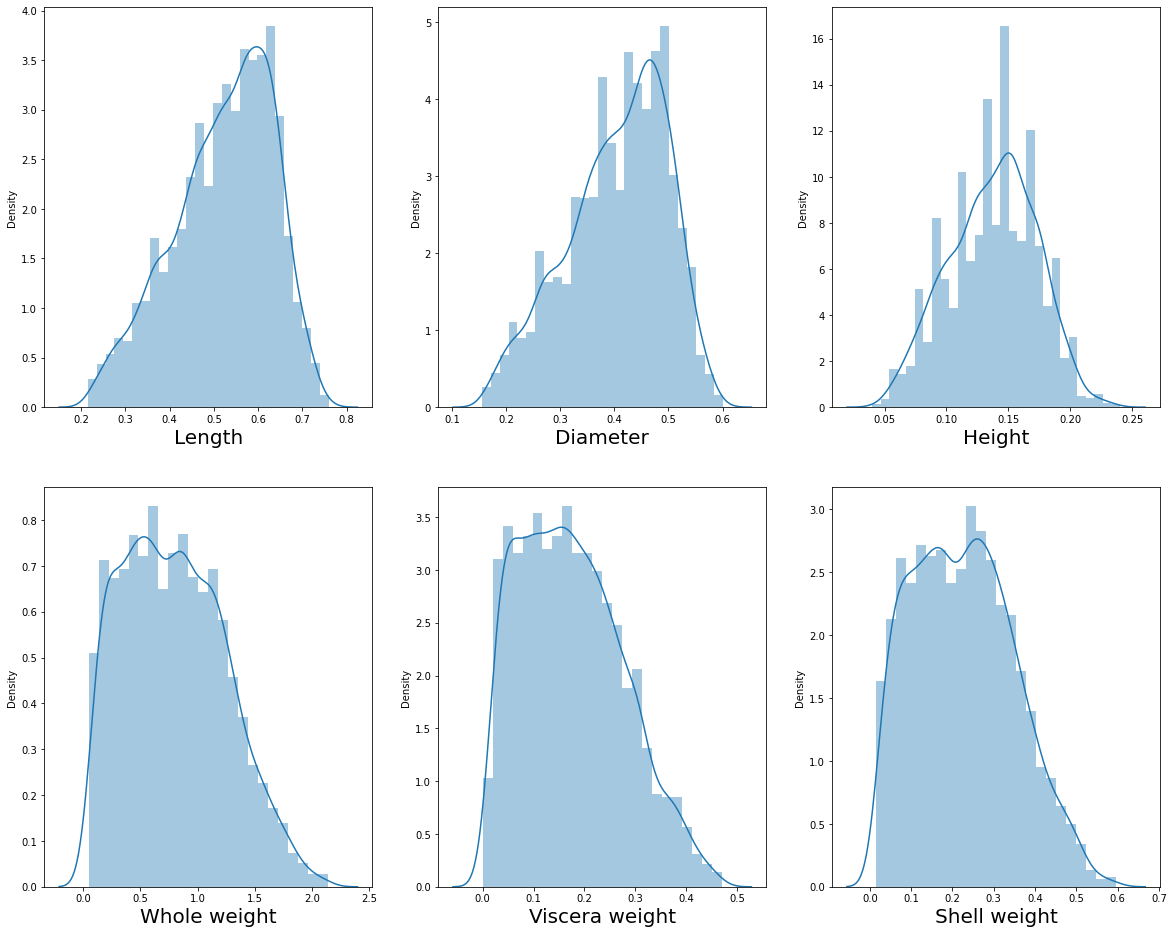

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_clean.columns:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(data_clean[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

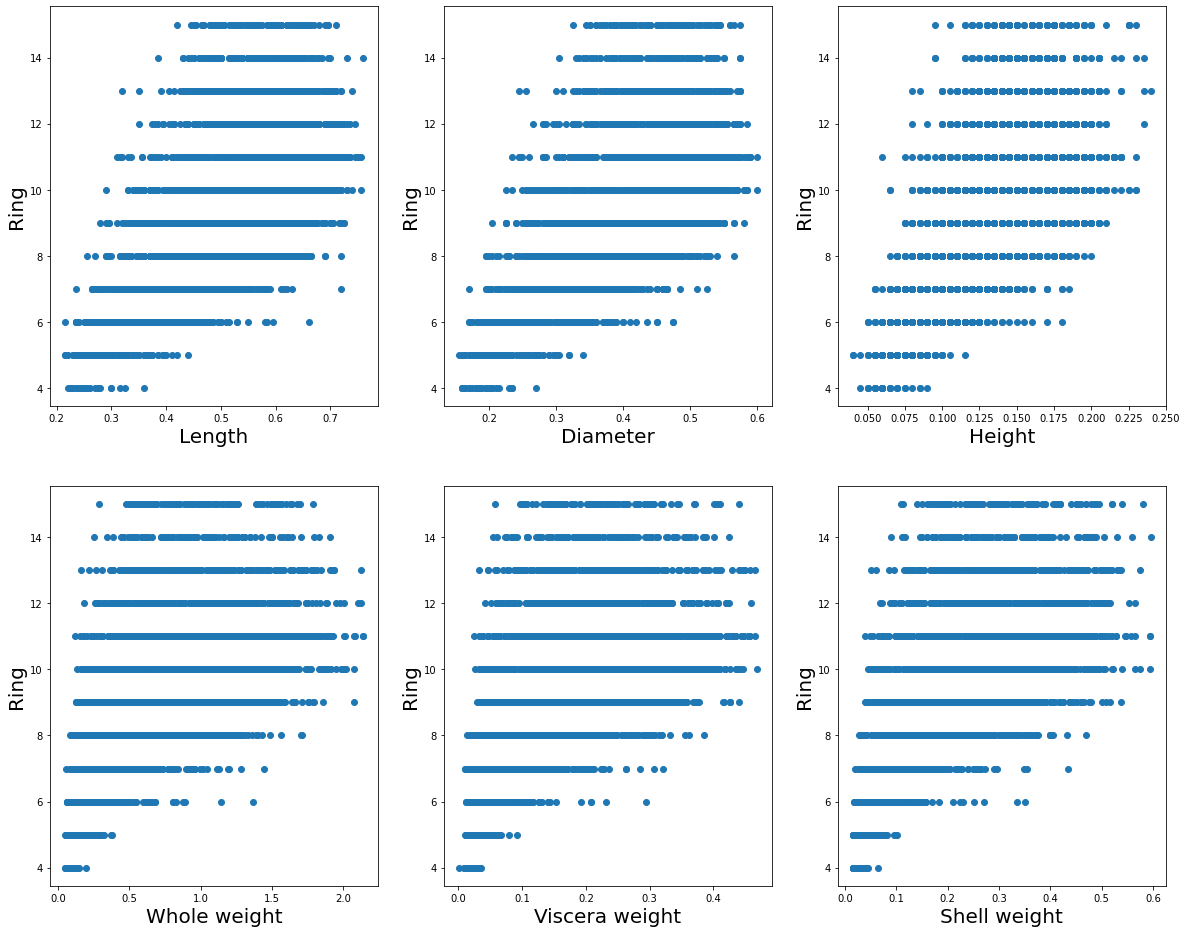

In [37]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data_clean.columns:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(data_clean[i],data_clean['Rings'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Ring',fontsize=20)
    plotnumber+=1
plt.show()

### From the above plot all I could deduce was that increase in feature value increases value of ring value. 
### Basically regression problem 

In [38]:
y = data_clean[['Rings']].values
x = data_clean.drop(columns = ['Rings'])

### check skew

In [39]:
print(x.skew())

Length           -0.49
Diameter         -0.48
Height           -0.15
Whole weight      0.37
Viscera weight    0.44
Shell weight      0.32
dtype: float64


In [40]:
print(len(x.skew().loc[x.skew()>0.55])) # Number of features having skewness more than 0.55 

0


### no biasing found

### lets do feature scaling

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

### check multicollinearity

In [42]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,39.25,Length
1,40.03,Diameter
2,6.45,Height
3,33.27,Whole weight
4,15.86,Viscera weight
5,16.29,Shell weight


### Multicollinearity only affects the coefficients and p-values, but it does not influence the model’s ability to predict the dependent variable.

### levels of multicollinearity does it signify.

### VIF ~ 1: Negligible
### 1<VIF<5 : Moderate
### VIF>5 : Extreme

### fix Multicollinearity

### remove highest collinearity which is diameter (as diameter is perpendicular to length by qt) & whole weight (as it is a summation of all weight)

In [43]:
x = data_clean.drop(columns = ['Diameter','Rings','Whole weight'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,9.16,Length
1,6.31,Height
2,8.31,Viscera weight
3,10.51,Shell weight


### this is acceptable now

### perform pca

In [44]:
for i in range(2,5):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_scaled)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9617685576508604
3 0.9823214521228871
4 0.9999999999999999


### i want to choose 2 columns as they are able to retain more than 95% data

In [45]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

### Now we will start with model selection and tuning training process.
### first find the most optimum model
### second we need to find the most optimum random state in train test split
### we shall evaluate model on r2 score
### Now write code to find best model along with the best hyper parameter

### code to find best random state for train test split

In [88]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

### code to find best classifier model among all

In [47]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=42, test_size=0.2)

In [48]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:10<00:00,  4.12it/s]


In [49]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.43,0.43,1.79,3.09
GradientBoostingRegressor,0.43,0.43,1.80,0.31
NuSVR,0.42,0.43,1.80,0.69
OrthogonalMatchingPursuitCV,0.41,0.41,1.82,0.03
LassoLarsIC,0.41,0.41,1.82,0.01
LarsCV,0.41,0.41,1.82,0.05
Lars,0.41,0.41,1.82,0.03
LassoLarsCV,0.41,0.41,1.82,0.02
TransformedTargetRegressor,0.41,0.41,1.82,0.01


Accuracy too low try with original data without removing so many columns

In [50]:
x = data_clean.drop(columns = ['Rings'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,39.25,Length
1,40.03,Diameter
2,6.45,Height
3,33.27,Whole weight
4,15.86,Viscera weight
5,16.29,Shell weight


In [51]:
for i in range(2,x.shape[1]+1):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_scaled)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9610306941307604
3 0.9823604222888382
4 0.9942594903123056
5 0.9977733178673887
6 0.9999999999999998


In [52]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_scaled)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=42, test_size=0.2)

In [54]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:12<00:00,  3.49it/s]


In [55]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.48,0.48,1.71,0.53
MLPRegressor,0.48,0.48,1.71,3.48
NuSVR,0.47,0.48,1.72,0.67
SVR,0.47,0.47,1.73,0.72
RandomForestRegressor,0.45,0.45,1.75,1.19
LGBMRegressor,0.44,0.45,1.77,0.13
LarsCV,0.44,0.44,1.77,0.06
Lars,0.44,0.44,1.77,0.03
LassoLarsCV,0.44,0.44,1.77,0.09


nope trying from start by not only sex column

In [56]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.56,0.45,0.17,0.89,0.37,0.24,0.25,11
4173,M,0.59,0.44,0.14,0.97,0.44,0.21,0.26,10
4174,M,0.60,0.47,0.20,1.18,0.53,0.29,0.31,9
4175,F,0.62,0.48,0.15,1.09,0.53,0.26,0.30,10


In [57]:
df=df.drop(['Sex'],axis=1)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7
...,...,...,...,...,...,...,...,...
4172,0.56,0.45,0.17,0.89,0.37,0.24,0.25,11
4173,0.59,0.44,0.14,0.97,0.44,0.21,0.26,10
4174,0.60,0.47,0.20,1.18,0.53,0.29,0.31,9
4175,0.62,0.48,0.15,1.09,0.53,0.26,0.30,10


In [58]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

print(df.shape)
#find how many rows are left in the dataframe 
data_clean.shape

(4177, 8)


(3781, 8)

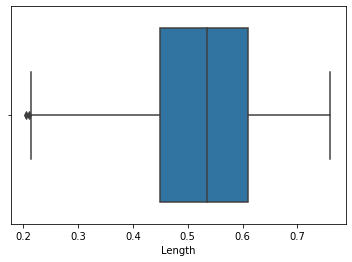

In [59]:
sn.boxplot(data_clean['Length'])

In [60]:
z_scr=zscore(data_clean)
print(data_clean.shape)
df_new=data_clean.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(3781, 8)
(3764, 8)


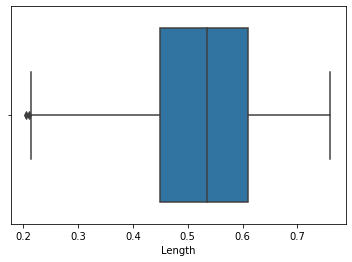

In [61]:
sn.boxplot(df_new['Length'])

In [62]:
Q1 = df_new.quantile(q=.25)
Q3 = df_new.quantile(q=.75)
IQR = df_new.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df_new[~((df_new < (Q1-1.5*IQR)) | (df_new > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(3762, 8)

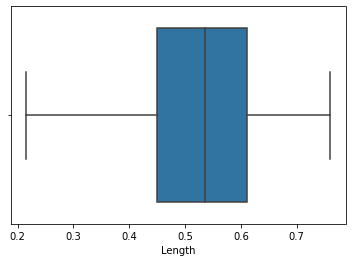

In [63]:
sn.boxplot(data_clean['Length'])

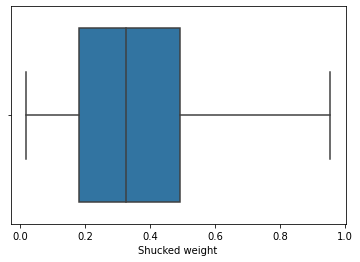

In [64]:
sn.boxplot(data_clean['Shucked weight'])

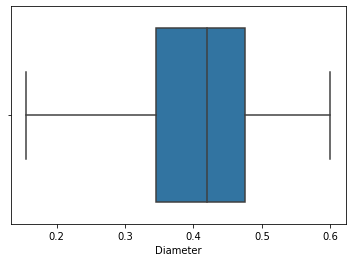

In [65]:
sn.boxplot(data_clean['Diameter'])

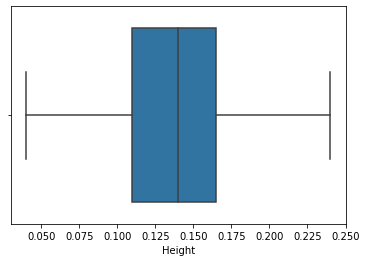

In [66]:
sn.boxplot(data_clean['Height'])

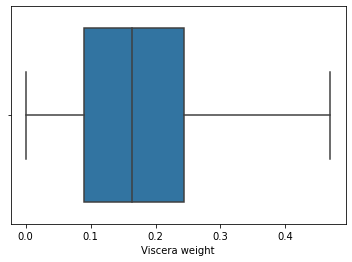

In [67]:
sn.boxplot(data_clean['Viscera weight'])

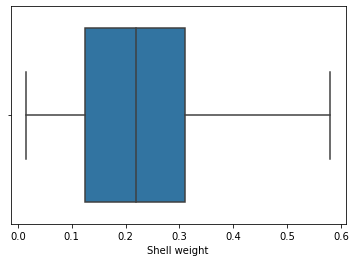

In [68]:
sn.boxplot(data_clean['Shell weight'])

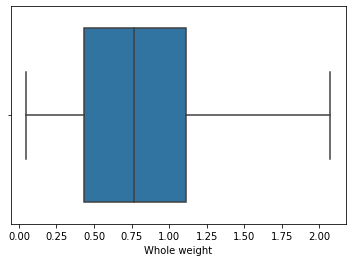

In [69]:
sn.boxplot(data_clean['Whole weight'])

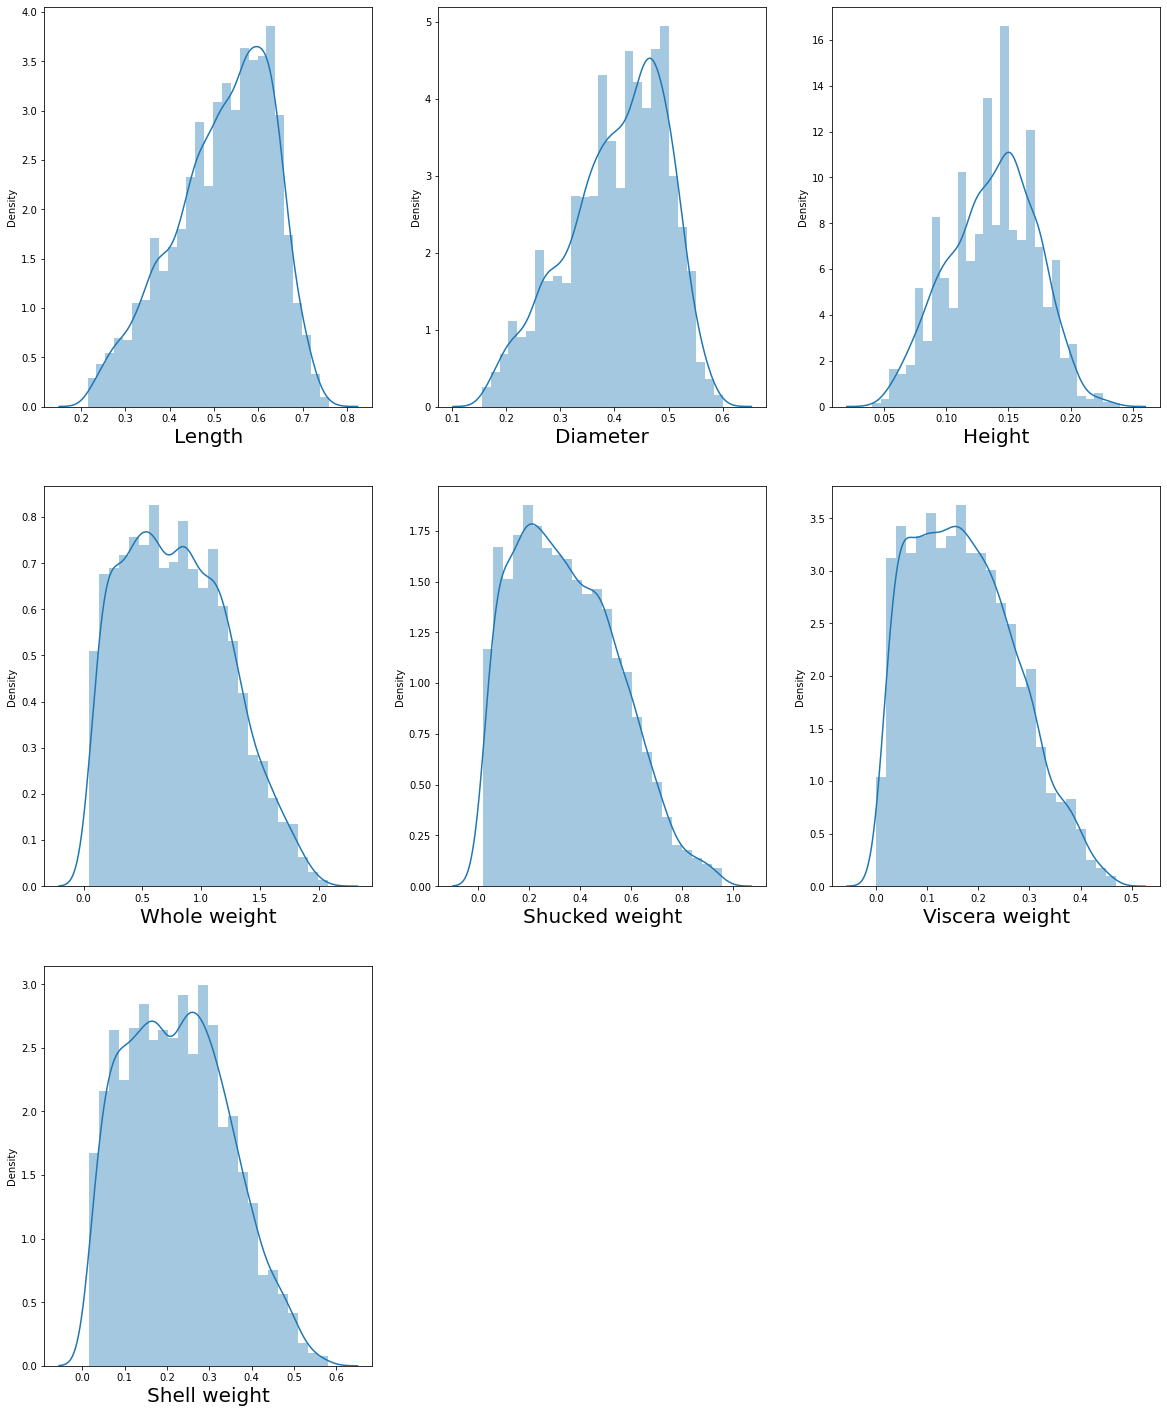

In [70]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_clean.columns:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(data_clean[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

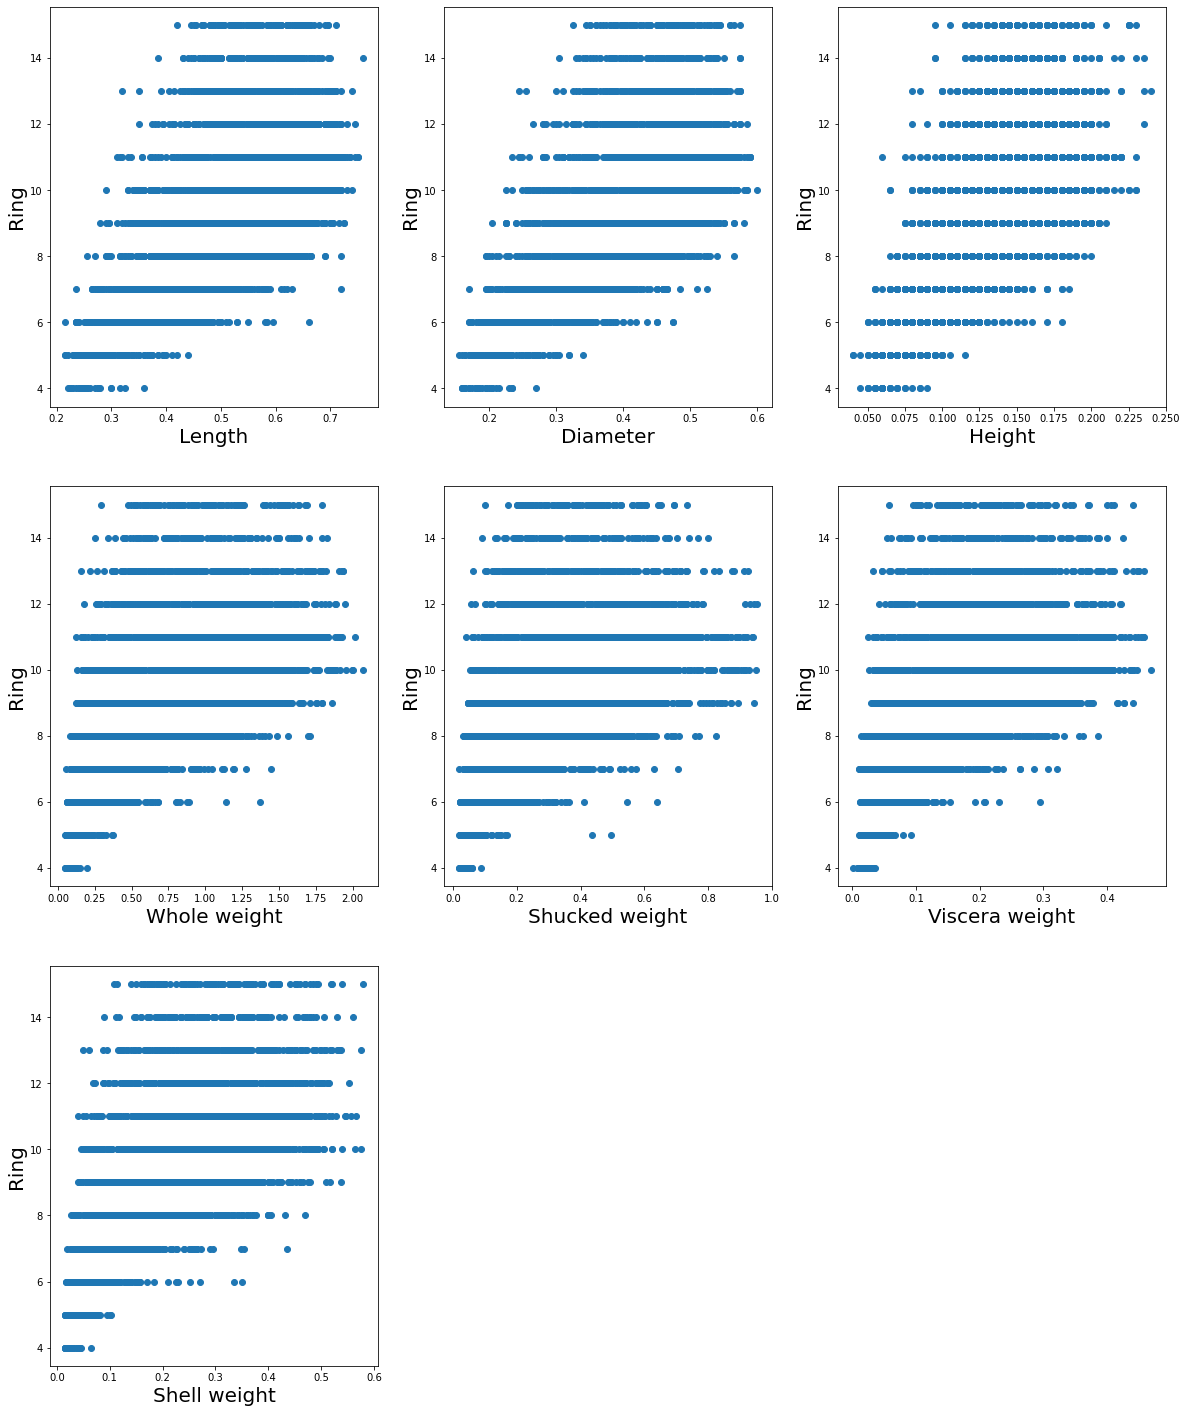

In [71]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data_clean.columns:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(data_clean[i],data_clean['Rings'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Ring',fontsize=20)
    plotnumber+=1
plt.show()

In [72]:
y = data_clean[['Rings']]
x = data_clean.drop(columns = ['Rings'])

In [73]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [74]:
print(x.skew())

Length           -0.50
Diameter         -0.49
Height           -0.15
Whole weight      0.32
Shucked weight    0.45
Viscera weight    0.42
Shell weight      0.30
dtype: float64


In [75]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [77]:
for i in range(2,8):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_scaled)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9582506599028324
3 0.9765616064287007
4 0.9878222341050831
5 0.9971157493465757
6 0.9990417007895933
7 0.9999999999999999


In [78]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_scaled)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=42, test_size=0.2)

In [80]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:12<00:00,  3.37it/s]


In [81]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,0.57,0.57,1.60,0.68
SVR,0.56,0.56,1.62,0.71
MLPRegressor,0.56,0.56,1.62,3.38
GradientBoostingRegressor,0.55,0.55,1.63,0.52
SGDRegressor,0.52,0.52,1.68,0.03
LassoLarsCV,0.52,0.52,1.68,0.09
Lars,0.52,0.52,1.68,0.04
LarsCV,0.52,0.52,1.68,0.07
TransformedTargetRegressor,0.52,0.52,1.68,0.02


From the above i understand that Nusvr is the best model. lets start hyper parameter tuning

In [84]:
parameters={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],"C":[0.001,0.01,0.1,1,10],"gamma":['scale', 'auto']}
clf = GridSearchCV(NuSVR(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [89]:
besttrain(NuSVR(kernel='rbf',C=10,gamma='auto'),principalComponents,y)

83

In [91]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 83,test_size=0.20,shuffle=True)
model=NuSVR(kernel='rbf',C=10,gamma='auto')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(model,x,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.5915442555824866
mean absolute error: 1.2068089439805334
mean squared error: 2.5070111387719844
root mean square error: 1.5833543945598485
cross val score 0.437867856320812
std err 0.07666036069598929


In [93]:
joblib.dump(model,'Abalone.obj')

['Abalone.obj']